In [22]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

In [23]:
df = pd.read_csv("../datasets/mall_customers.csv")

In [24]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.shape

(200, 5)

In [26]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['annual_income','spending_score']])

df_scale = pd.DataFrame(scale, columns = ['annual_income','spending_score']);
df_scale.head(5)

,annual_income,spending_score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [27]:
df.shape

(200, 5)

In [28]:
km = KMeans(n_clusters=2)

y_predicted = km.fit_predict(df[['annual_income','spending_score']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
km.cluster_centers_

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

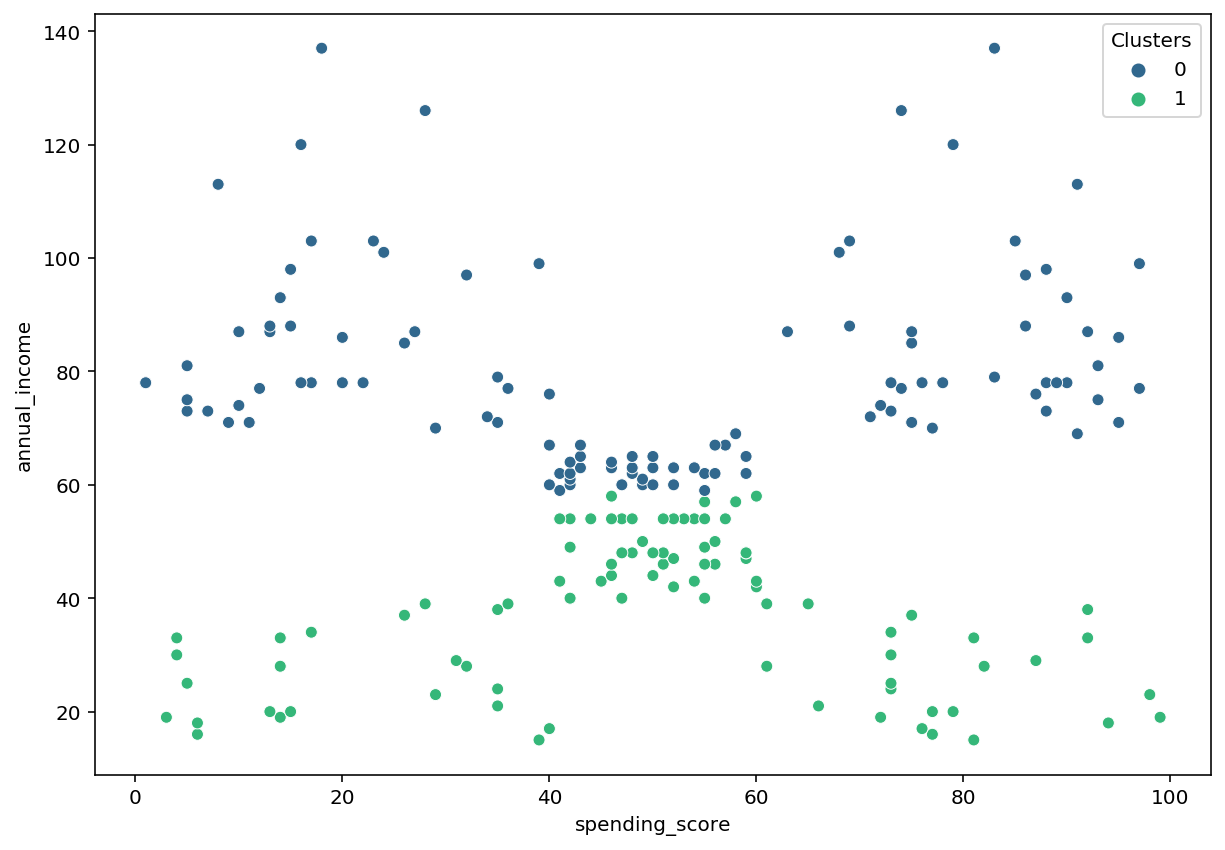

In [30]:
df['Clusters'] = km.labels_

sns.scatterplot(x="spending_score", y="annual_income", hue = 'Clusters',  data=df,palette='viridis')
plt.show()

In [31]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,0.123331,-0.370554
1,-0.305114,-0.380973
2,0.459767,-0.354173
3,-0.264509,-0.371786
4,0.112731,-0.354413


## The Silhouette Method

In [37]:
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))
    
# max. value k = 5

Silhouette score for k(clusters) = 2 is 0.6394798696693627
Silhouette score for k(clusters) = 3 is 0.6556460222112966
Silhouette score for k(clusters) = 4 is 0.781322274507506
Silhouette score for k(clusters) = 5 is 0.8513069521844733
Silhouette score for k(clusters) = 6 is 0.7797360662991701
Silhouette score for k(clusters) = 7 is 0.7141899179611841
Silhouette score for k(clusters) = 8 is 0.6867387969932462
Silhouette score for k(clusters) = 9 is 0.4860237092532654
Silhouette score for k(clusters) = 10 is 0.4877584769898789
Silhouette score for k(clusters) = 11 is 0.446938989348656


In [32]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(pca_df)

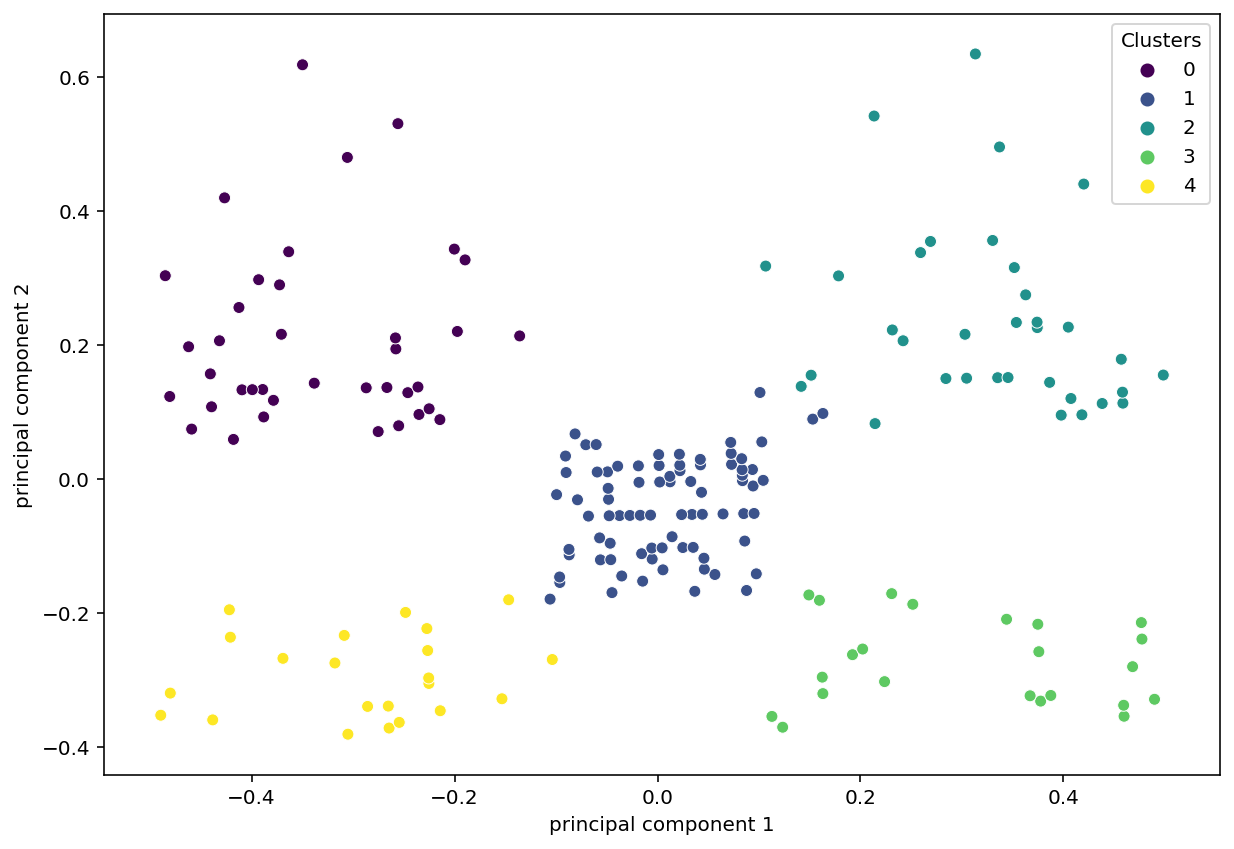

In [34]:
pca_df['Clusters'] = kmeans.labels_

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis')
plt.show()